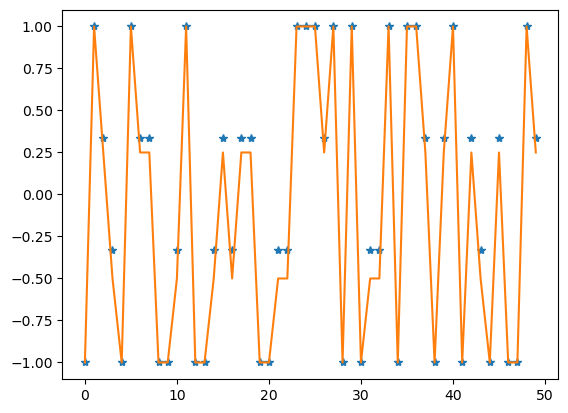

In [1]:
import os, sys
ieeeProjectDir = os.environ.get('IEEE8023')
if ieeeProjectDir == None: 
     ieeeProjectDir = "c:/users/omer/802.3/"
sys.path.insert(0, ieeeProjectDir)
import numpy as np
import modulationFunctions as mf
import channelFunctions as cf
import matplotlib.pyplot as plt
import graphics
from IPython.display import Image
import numpy as np
LOCAL_PRNG = np.random.RandomState(7134066)
SAMPLE_SIZE = 10000
Image("pam4MATLABUncoded.png")
binaryData = np.random.randint(0,2,100)
modulatedVector, pam4SymbolsTx, pam4SymbolsPrecoded = mf.modulatePAM4(binaryData, grayCoding = True, precoding = False)
quantizedSignal = mf.pam4Quantize(modulatedVector, effectiveNumberOfBits = 2)
fig, ax = plt.subplots()
ax.plot(modulatedVector,'*')
ax.plot(quantizedSignal)
pam4SymbolsRx, errorAbsoluteValue = mf.pam4Slice(modulatedVector)
bitsRx = mf.pam4SymbolsToBits(pam4SymbolsRx, grayCoded = True)

![title](./pam4MATLAB.png)

In [2]:
berPam4UncodedMATLAB = np.array([0.140980000000000,0.129900000000000,0.119000000000000,0.108270000000000,0.0977420000000000,0.0874510000000000,0.0774530000000000,0.0678180000000000,0.0586240000000000,0.0499550000000000,0.0418930000000000,0.0345110000000000,0.0278710000000000,0.0220160000000000,0.0169670000000000,0.0127200000000000,0.00924720000000000,0.00649530000000000,0.00439030000000000,0.00284270000000000,0.00175420000000000,0.00102570000000000,0.000564710000000000,0.000290600000000000,0.000138660000000000,6.07860000000000e-05,2.42340000000000e-05,8.68610000000000e-06,2.76320000000000e-06,7.68970000000000e-07,1.84190000000000e-07,3.72860000000000e-08,6.25020000000000e-09,8.47880000000000e-10,9.07160000000000e-11,7.43680000000000e-12,4.52230000000000e-13])
ebn0 = np.arange(0,18.5,0.5)

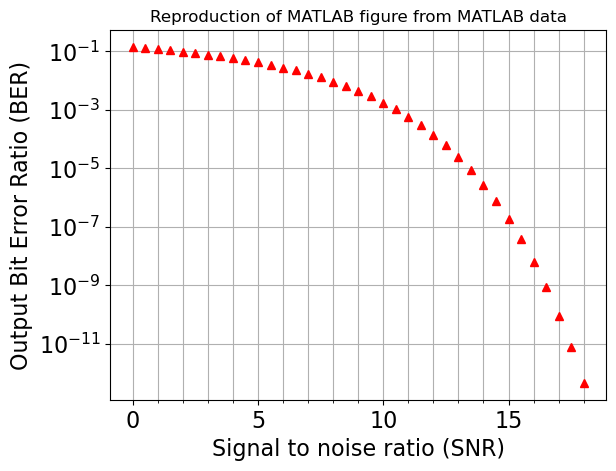

In [3]:

    fig, ax = plt.subplots()
    pam4UncodedMatlab = ax.semilogy(ebn0, berPam4UncodedMATLAB, '^r', linewidth = 2, label = 'PAM 4 Uncoded MATLAB')
    ax.set_ylabel('Output Bit Error Ratio (BER)',fontsize=16)
    ax.set_xlabel('Signal to noise ratio (SNR)',fontsize=16)
    ax.set_title("Reproduction of MATLAB figure from MATLAB data")    
    ax.tick_params(axis='both',  labelsize=16)
    #fig.set_size_inches(6.25, 6)
    ax.grid(True, which="both")
    ax.minorticks_on()
    plt.show()
    

In [4]:
berData = []
L = 4
factor = np.sqrt((L ** 2 - 1)/3) # For L == 4 This is the same (?) as (1)^2 + (-1)^2 + (1/3)^2 + (-1/3)^2
factor = 1
for e in ebn0:
    berE = 0
    data = LOCAL_PRNG.randint(low = 0, high = 2, size = SAMPLE_SIZE)
    modulatedData, pam4Symbols, pam4SymbolsPrecoded = mf.modulatePAM4(data, grayCoding=False, precoding=False)
    noisyData,_,_ = cf.additiveWhiteGaussianNoise(modulatedData, length = len(modulatedData), SNRdb = e * factor , prng = LOCAL_PRNG, d = 0.15)
    pam4Symbols, error = mf.pam4Slice(noisyData)
    dataRx = mf.pam4SymbolsToBits(pam4Symbols, grayCoded= False)
    berE = np.sum(dataRx != data) / SAMPLE_SIZE
    berData.append(berE)

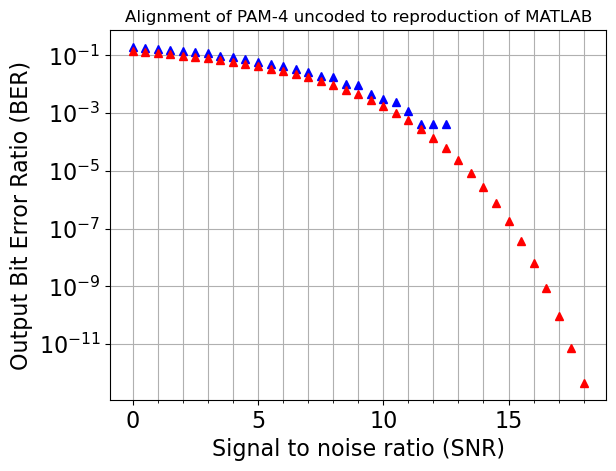

In [5]:
fig, ax = plt.subplots()
pam4Simulated = ax.semilogy(ebn0, np.array(berData), '^b', linewidth = 2, label = 'PAM 4 Uncoded simulated')
pam4UncodedMatlab = ax.semilogy(ebn0, berPam4UncodedMATLAB, '^r', linewidth = 2, label = 'PAM 4 Uncoded MATLAB')
ax.set_ylabel('Output Bit Error Ratio (BER)',fontsize=16)
ax.set_xlabel('Signal to noise ratio (SNR)',fontsize=16)
ax.set_title("Alignment of PAM-4 uncoded to reproduction of MATLAB")    
ax.tick_params(axis='both',  labelsize=16)
ax.grid(True, which="both")
ax.minorticks_on()
plt.show()

In [8]:
# Now with gray coding
berGrayCoded = []
for e in ebn0:
    berE = 0
    data = LOCAL_PRNG.randint(low = 0, high = 2, size = SAMPLE_SIZE)
    modulatedData, pam4Symbols, pam4SymbolsPrecoded = mf.modulatePAM4(data, grayCoding=True, precoding=False)
    noisyData,_,_ = cf.additiveWhiteGaussianNoise(modulatedData, length = len(modulatedData), SNRdb = e * factor , prng = LOCAL_PRNG, d = 0.15)
    pam4Symbols, error = mf.pam4Slice(noisyData)
    dataRx = mf.pam4SymbolsToBits(pam4Symbols, grayCoded= True)
    berE = np.sum(dataRx != data) / SAMPLE_SIZE
    berGrayCoded.append(berE)

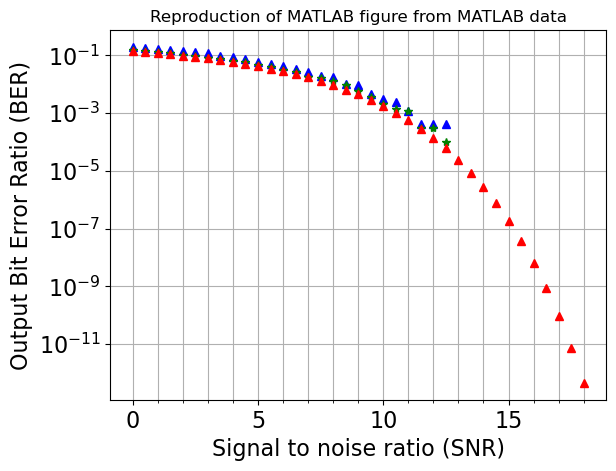

In [9]:
fig, ax = plt.subplots()
pam4Simulated = ax.semilogy(ebn0, np.array(berData), '^b', linewidth = 2, label = 'PAM 4 Uncoded simulated')
pam4GrayCodedSimulated = ax.semilogy(ebn0, np.array(berGrayCoded), '*g', linewidth = 2, label = 'PAM 4 Gray coded simulated')
pam4UncodedMatlab = ax.semilogy(ebn0, berPam4UncodedMATLAB, '^r', linewidth = 2, label = 'PAM 4 Uncoded MATLAB')
ax.set_ylabel('Output Bit Error Ratio (BER)',fontsize=16)
ax.set_xlabel('Signal to noise ratio (SNR)',fontsize=16)
ax.set_title("Reproduction of MATLAB figure from MATLAB data")    
ax.tick_params(axis='both',  labelsize=16)
ax.grid(True, which="both")
ax.minorticks_on()
plt.show()